In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import classify
import mcc

In [2]:
import htwt

In [3]:
mvn = stats.multivariate_normal.rvs
y = 1.0 * np.random.choice(2, size = 200)
X = np.array([mvn([1, 1] if heads else [4, 4]) for heads in y])

In [4]:
X, y = htwt.get()

In [43]:
import nb
import lda
import qda
reload(qda)
import irls
import logistic
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression

In [47]:
clf = BernoulliNB()
clf = nb.bernoulli()
clf = GaussianNB()
clf = nb.gaussian()
clf = QDA()
clf = qda.Classifier()
clf = LDA()
clf = lda.Classifier()
clf = logistic.Classifier()
clf = LogisticRegression()
clf = irls.Classifier()

In [48]:
clf.fit(X, y)
print '%0.3f' % np.mean(np.mean(clf.predict(X) != y))

0.119


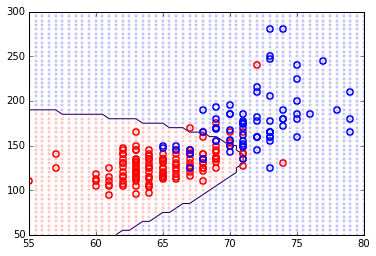

In [49]:
classify.show_points(X, y)
classify.show_regions(clf, X)
#classify.show_contour(clf, X)
plt.show()